# Análise de posts do CoinMarketCap

Esta é uma análise de posts sobre criptoativos do website CoinMarketCap.
Estes posts são feitos na comunidade CoinMarketCap por usuários que expressam ou não algum sentimento sobre determinado criptoativo.
Os posts podem ser classificados em 3 classes:
- **Bullish**: Está otimista
- **Bearsih**: Está pessimista
- **None**: Não foi definido

É feito uma extração dos dados dos comentários mais recentes por meio de uma requisão via API.
A imagem abaixo mostra alguns dos comentários e suas classificações sobre o BTC:
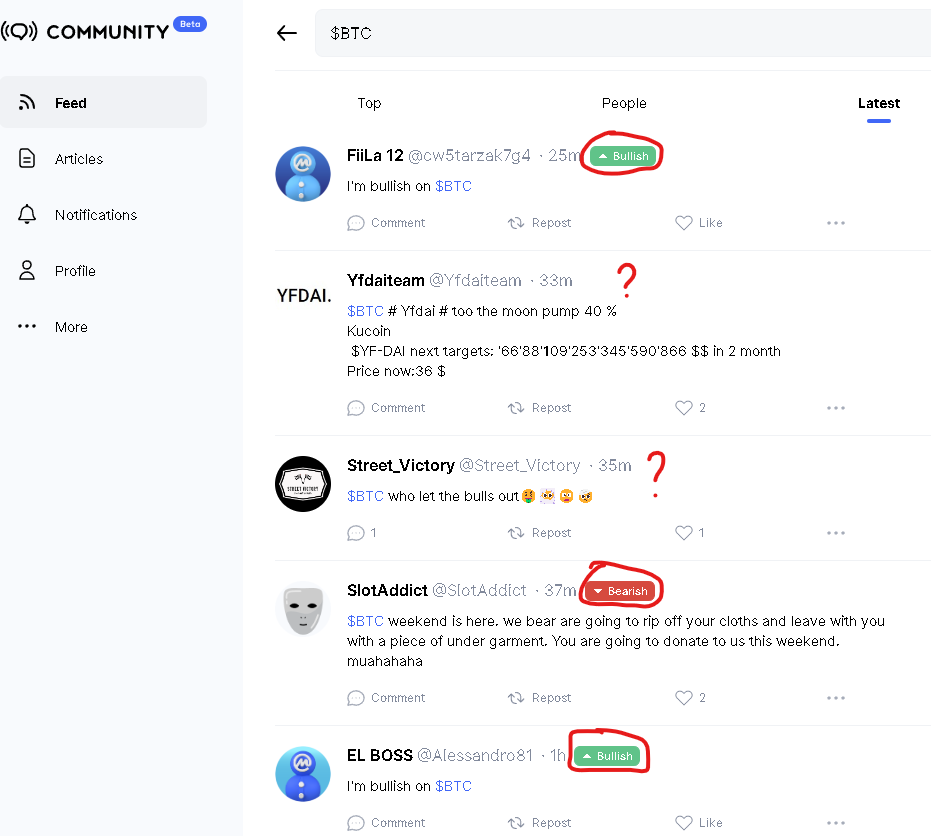

OBS: Esta análise não faz a classificação dos posts. É realizada somente uma análise dos posts já feitos e classificados pelos usuários. As classificações dos posts são feitas pelos próprios usuários no momento da postagem conforme mostrado na imagem abaixo:
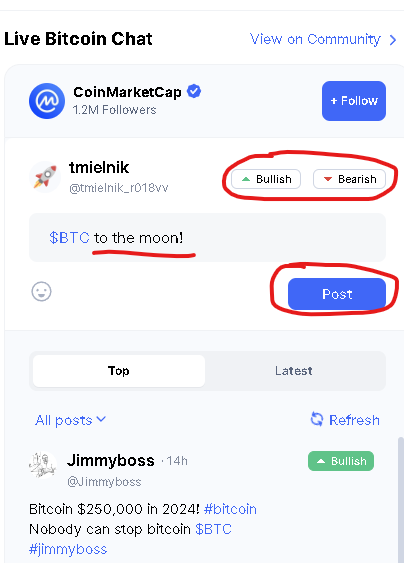

In [9]:
import requests  # Requisições para API
import json  # Manipulação de arquivos json
import matplotlib.pyplot as plt # Visualização em gráfico

In [2]:
# Link da API que fornece os dados (link obtido inspecionando a página do CoinMarketCap)
URL = 'https://api-gravity.coinmarketcap.com/gravity/v3/gravity/'


# Parâmetro que define o número de páginas de posts a serem consultadas. Cada página mostra aproximadamento 10 posts.
# Como esta API não tem documentação para o público, uma forma de conseguir buscar os dados foi por meio do estudo e testes com a URL.
# É feita uma requisição por página.
# Para obter os dados dos criptoativos desejados, basta ajustar os parâmetros do seguinte path: 
# 'search?symbol={symbol}&start={num_page}&handleOnly=false&latestSort=true'
TOTAL_PAGES = 50

### Obtém dados de posts da comunidade do coinmarketcap

In [3]:
def get_coinmarketcap_posts(symbol):
    posts = []

    try:
        # Busca os posts de cada página até o número de páginas definido
        for num_page in range(TOTAL_PAGES):
            path = f'search?symbol={symbol}&start={num_page}&handleOnly=false&latestSort=true'

            print(f'Consulta {num_page + 1}: {URL + path}')
            json_data = requests.get(URL + path).json() # Obtém os dados em formato json
            json_data = json_data['data'] # Obtem somente a lista de posts
            
            if not json_data: # Verifica se retornou uma lista vazia
                raise Exception('Busca parou de retornar dados...')

            # Adiciona posts na lista de posts
            posts = posts + json_data

    except Exception as error:
        print(error)  
    finally:
        return posts

### Analisa o sentimento dos posts obtidos

In [4]:
def get_sentiment_posts(posts):

    # Verifica se há posts para analisar
    if not posts:
        raise Exception('Não há dados de posts para analisar...')

    tag_bullish = 0
    tag_bearish = 0
    tag_notDefined = 0

    for post in posts:
        # Verifica se não existe o atributo bullish (post não está classificado)
        if 'bullish' not in post.keys(): 
            tag_notDefined += 1
            
        # Bullish      
        elif post['bullish'] == True:
            tag_bullish += 1
            
        # Bearish
        elif post['bullish'] == False:
            tag_bearish += 1

    return tag_bullish, tag_bearish, tag_notDefined

### (Opcional) Salva os posts em um arquivo .json

Salva a lista de posts em um arquivo .json para visualização mais detalhada.

In [39]:
def save_file_json(symbol, posts):
    with open(f'{symbol}_posts_coinmarketcap.json', 'w') as file:
        json.dump(posts, file, indent=4)
        
save_file_json(SYMBOL, list_posts)

### Resultado: busca de dados

In [43]:
list_posts = None
try:
    SYMBOL = 'SOL'
    list_posts = get_coinmarketcap_posts(SYMBOL)

    print()
    print(f'Cryptoasset: {SYMBOL}')
    print(f'Total de posts: {len(list_posts)}')
    print()
except Exception as error:
    print(error)


Consulta 1: https://api-gravity.coinmarketcap.com/gravity/v3/gravity/search?symbol=SOL&start=0&handleOnly=false&latestSort=true
Consulta 2: https://api-gravity.coinmarketcap.com/gravity/v3/gravity/search?symbol=SOL&start=1&handleOnly=false&latestSort=true
Consulta 3: https://api-gravity.coinmarketcap.com/gravity/v3/gravity/search?symbol=SOL&start=2&handleOnly=false&latestSort=true
Consulta 4: https://api-gravity.coinmarketcap.com/gravity/v3/gravity/search?symbol=SOL&start=3&handleOnly=false&latestSort=true
Consulta 5: https://api-gravity.coinmarketcap.com/gravity/v3/gravity/search?symbol=SOL&start=4&handleOnly=false&latestSort=true
Consulta 6: https://api-gravity.coinmarketcap.com/gravity/v3/gravity/search?symbol=SOL&start=5&handleOnly=false&latestSort=true
Consulta 7: https://api-gravity.coinmarketcap.com/gravity/v3/gravity/search?symbol=SOL&start=6&handleOnly=false&latestSort=true
Consulta 8: https://api-gravity.coinmarketcap.com/gravity/v3/gravity/search?symbol=SOL&start=7&handleOnl

### Resultado: análise de sentimento

In [44]:
try:
    sentiment_tuple = get_sentiment_posts(list_posts)
    print(f'Resumo sentimento dos posts: {sentiment_tuple}')
    
    total_posts = len(list_posts)
    
    print(f'BULLISH: {sentiment_tuple[0]} -> {(sentiment_tuple[0] / total_posts) * 100}%')
    print(f'BEARISH: {sentiment_tuple[1]} -> {(sentiment_tuple[1] / total_posts) * 100}%')
    print(f'NÃO-DEFINIDO: {sentiment_tuple[2]} -> {(sentiment_tuple[2] / total_posts) * 100}%')
except Exception as error:
    print(error)

Resumo sentimento dos posts: (171, 165, 164)
BULLISH: 171 -> 34.2%
BEARISH: 165 -> 33.0%
NÃO-DEFINIDO: 164 -> 32.800000000000004%


### Resultado: gráfico de barras

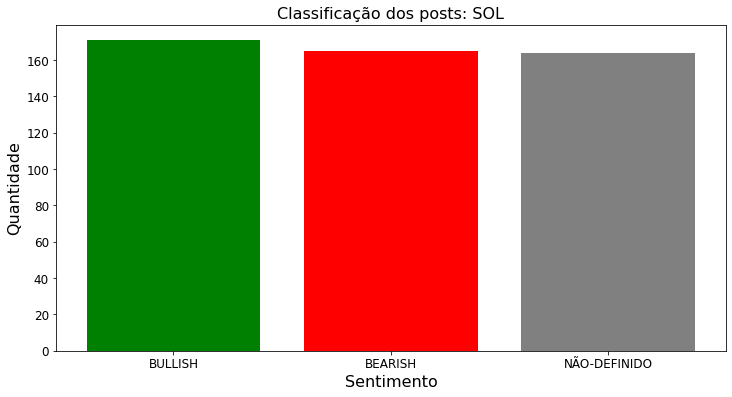

In [45]:
classes = ['BULLISH', 'BEARISH', 'NÃO-DEFINIDO']

# Ajusta o tamanho da fonte dos valores x,y
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.figure(figsize=(12,6))
plt.title(f'Classificação dos posts: {SYMBOL}', fontdict={'size':16})
plt.xlabel('Sentimento', fontdict={'size':16})
plt.ylabel('Quantidade', fontdict={'size':16})

plt.bar(classes, sentiment_tuple, color=('green', 'red', 'grey'))
plt.show()

### Considerações finais

Podemos perceber que muitas das postagens realizadas pelos usuários não foram classificadas durante as postagens. Estas postagens não-classificadas podem conter palavras que podem assumir um sentimento Bullish ou sentimento Bearish que poderia apresentar um resultado mais coerente.

Outra observação: os usuários podem demonstrar um sentimento nas palavras descritas, mas ocorre o risco de selecionarem a categoria errada na hora da postagem e, com isto, ocasiona uma divergência entre o descrito e o classificado.

Uma solução mais adequada para este problema de análise de sentimento em postagens, seria por meio da aplicação de técnicas de mineração de textos e processamento de linguagem natural.